In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [7]:
df=pd.read_csv("D:/Insurance_AI_project/datasets/synthetic_insurance_claims.csv")

In [8]:
df.head()

,Customer_Age,Gender,Policy_Type,Annual_Income,Claim_History,Premium_Amount,Claim_Amount
0,58,Male,Health,48024,0,4330,9392.91
1,65,Male,Health,68698,1,4873,12606.14
2,23,Male,Life,36559,0,6852,12753.64
3,63,Other,Home,44446,1,5091,13381.83
4,69,Male,Life,57696,1,7795,16343.15


In [9]:
df.isnull().sum()

Customer_Age      0
Gender            0
Policy_Type       0
Annual_Income     0
Claim_History     0
Premium_Amount    0
Claim_Amount      0
dtype: int64

C:\Users\naveen\AppData\Local\Temp\ipykernel_12512\716348207.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Policy_Type', data=df, palette='Set3')


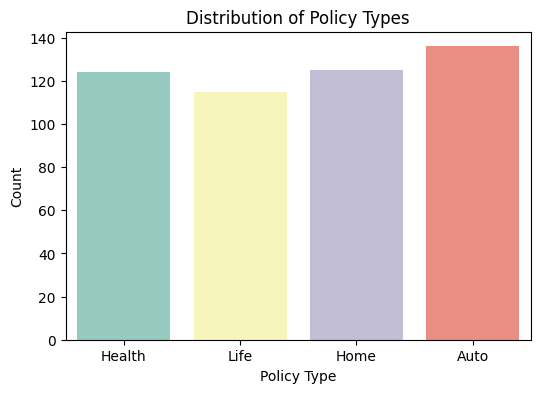

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='Policy_Type', data=df, palette='Set3')
plt.title('Distribution of Policy Types')
plt.xlabel('Policy Type')
plt.ylabel('Count')
plt.show()


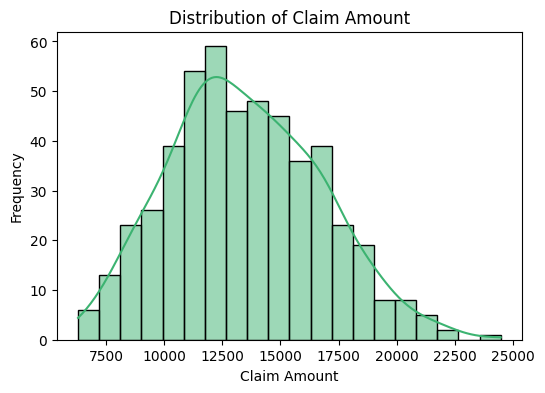

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df['Claim_Amount'], kde=True, bins=20, color='mediumseagreen')
plt.title('Distribution of Claim Amount')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.show()


C:\Users\naveen\AppData\Local\Temp\ipykernel_12512\893164709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Claim_Amount', data=df, palette='Set2')


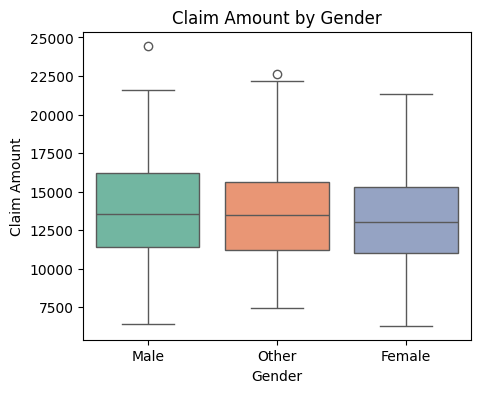

In [14]:
plt.figure(figsize=(5,4))
sns.boxplot(x='Gender', y='Claim_Amount', data=df, palette='Set2')
plt.title('Claim Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Claim Amount')
plt.show()


C:\Users\naveen\AppData\Local\Temp\ipykernel_12512\2867877445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Policy_Type', y='Claim_Amount', data=df, palette='Set3')


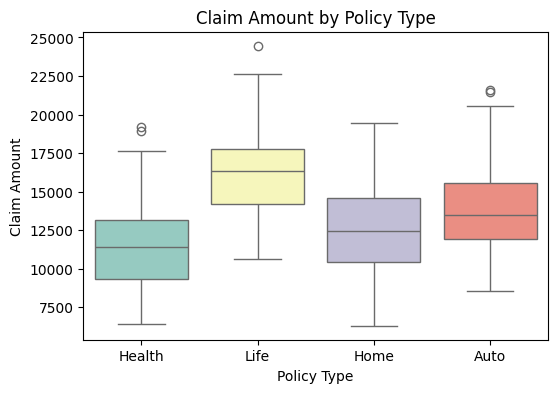

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Policy_Type', y='Claim_Amount', data=df, palette='Set3')
plt.title('Claim Amount by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Claim Amount')
plt.show()


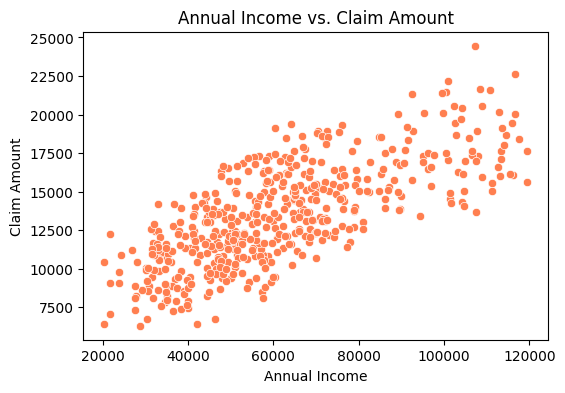

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Annual_Income', y='Claim_Amount', data=df, color='coral')
plt.title('Annual Income vs. Claim Amount')
plt.xlabel('Annual Income')
plt.ylabel('Claim Amount')
plt.show()


In [11]:
df = pd.get_dummies(df, columns=["Gender", "Policy_Type"], dtype=int)


In [12]:
df.head()

,Customer_Age,Annual_Income,Claim_History,Premium_Amount,Claim_Amount,Gender_Female,Gender_Male,Gender_Other,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Home,Policy_Type_Life
0,58,48024,0,4330,9392.91,0,1,0,0,1,0,0
1,65,68698,1,4873,12606.14,0,1,0,0,1,0,0
2,23,36559,0,6852,12753.64,0,1,0,0,0,0,1
3,63,44446,1,5091,13381.83,0,0,1,0,0,1,0
4,69,57696,1,7795,16343.15,0,1,0,0,0,0,1


In [13]:
 #Step 3: Scale numerical features
scaler = MinMaxScaler()
scaled_cols = ["Annual_Income", "Premium_Amount", "Customer_Age"]  # scale input only (not target)
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])


In [14]:
df.head()

,Customer_Age,Annual_Income,Claim_History,Premium_Amount,Claim_Amount,Gender_Female,Gender_Male,Gender_Other,Policy_Type_Auto,Policy_Type_Health,Policy_Type_Home,Policy_Type_Life
0,0.769231,0.279016,0,0.071408,9392.91,0,1,0,0,1,0,0
1,0.903846,0.487743,1,0.150058,12606.14,0,1,0,0,1,0,0
2,0.096154,0.163264,0,0.436703,12753.64,0,1,0,0,0,0,1
3,0.865385,0.242892,1,0.181634,13381.83,0,0,1,0,0,1,0
4,0.980769,0.376666,1,0.573291,16343.15,0,1,0,0,0,0,1


In [15]:
# Step 4: Save the scaler for later use (optional)
with open("scaler_claims.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [16]:
# Step 5: (Optional) Outlier removal from Claim_Amount using IQR
Q1 = df["Claim_Amount"].quantile(0.25)
Q3 = df["Claim_Amount"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["Claim_Amount"] >= Q1 - 1.5 * IQR) & (df["Claim_Amount"] <= Q3 + 1.5 * IQR)]


In [17]:
# Step 6: Define features and target
X = df.drop("Claim_Amount", axis=1)
y = df["Claim_Amount"]  # or np.log1p(df["Claim_Amount"]) if skewed


In [18]:
# Done ✅
print("Preprocessing complete! Features:", list(X.columns))

Preprocessing complete! Features: ['Customer_Age', 'Annual_Income', 'Claim_History', 'Premium_Amount', 'Gender_Female', 'Gender_Male', 'Gender_Other', 'Policy_Type_Auto', 'Policy_Type_Health', 'Policy_Type_Home', 'Policy_Type_Life']


In [20]:
# 3️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# 4️⃣ Random Forest Regressor
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# 5️⃣ XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

def evaluate(y_true, y_pred, model_name):
    print(f"📊 {model_name} Performance:")
    print(f"MAE : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²  : {r2_score(y_true, y_pred):.4f}")
    print("")

# 7️⃣ Evaluate Both Models
evaluate(y_test, rf_pred, "Random Forest")
evaluate(y_test, xgb_pred, "XGBoost")

📊 Random Forest Performance:
MAE : 833.14
RMSE: 1103.93
R²  : 0.8752

📊 XGBoost Performance:
MAE : 912.62
RMSE: 1213.54
R²  : 0.8491



In [22]:
import pickle

# Save model to a file
with open('random_forest_claims.pkl', 'wb') as f:
    pickle.dump(rf, f)

print("✅ Model saved as 'random_forest_claims.pkl'")


✅ Model saved as 'random_forest_claims.pkl'


In [23]:
# Load model from file
with open('random_forest_claims.pkl', 'rb') as f:
    loaded_rf = pickle.load(f)